In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\dataseti\fake_job_postings.csv')
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.shape

(17880, 18)

In [4]:
df.isnull().sum()[df.isnull().sum()>0]

location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
dtype: int64

In [5]:
df.isnull().sum().sort_values(ascending=False)/len(df.index)*100

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.324385
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.072707
location                1.935123
description             0.005593
job_id                  0.000000
telecommuting           0.000000
has_questions           0.000000
has_company_logo        0.000000
title                   0.000000
fraudulent              0.000000
dtype: float64

In [6]:
df.drop(['job_id' , 'salary_range' , 'telecommuting' , 'has_company_logo' , 'has_questions','employment_type'] , axis = 1,inplace = True)

In [7]:
df.head(2)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [8]:
df.isnull().sum()[df.isnull().sum()>0]

location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
dtype: int64

In [9]:
df.fillna('',inplace=True)

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [11]:
exp=dict(df.required_experience.value_counts())
exp

{'': 7050,
 'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

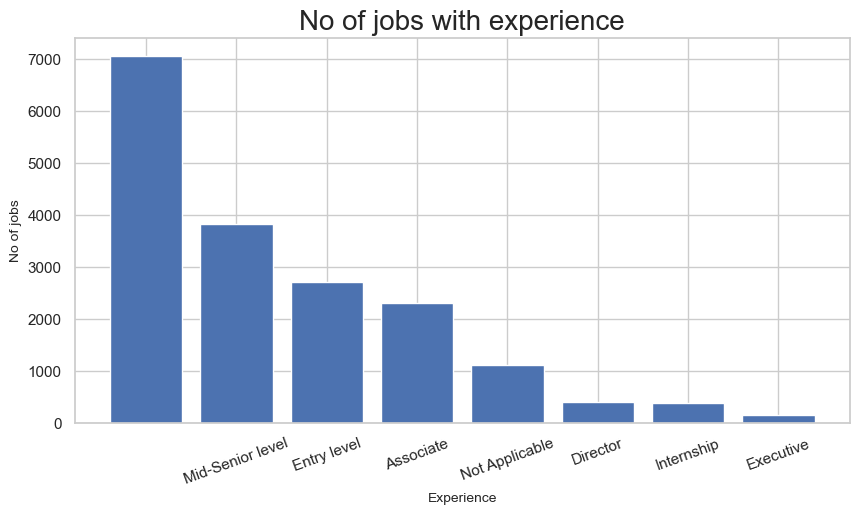

In [12]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(),exp.values())
plt.title('No of jobs with experience',size=20)
plt.xlabel('Experience',size=10)
plt.ylabel('No of jobs',size=10)
plt.xticks(rotation=20)
plt.show() 

In [13]:
def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split) 

In [14]:
countr=dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

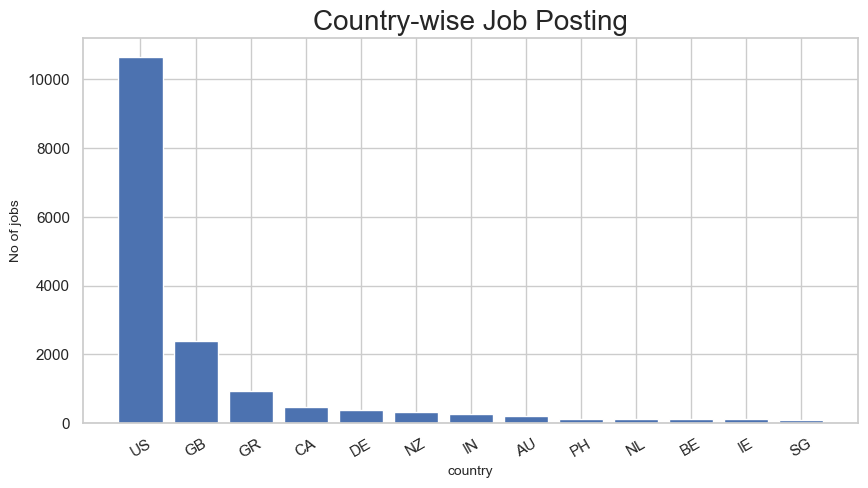

In [15]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(countr.keys(),countr.values())
plt.title('Country-wise Job Posting',size=20)
plt.xlabel('country',size=10)
plt.ylabel('No of jobs',size=10)
plt.xticks(rotation=30)
plt.show() 

In [16]:
edu=dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

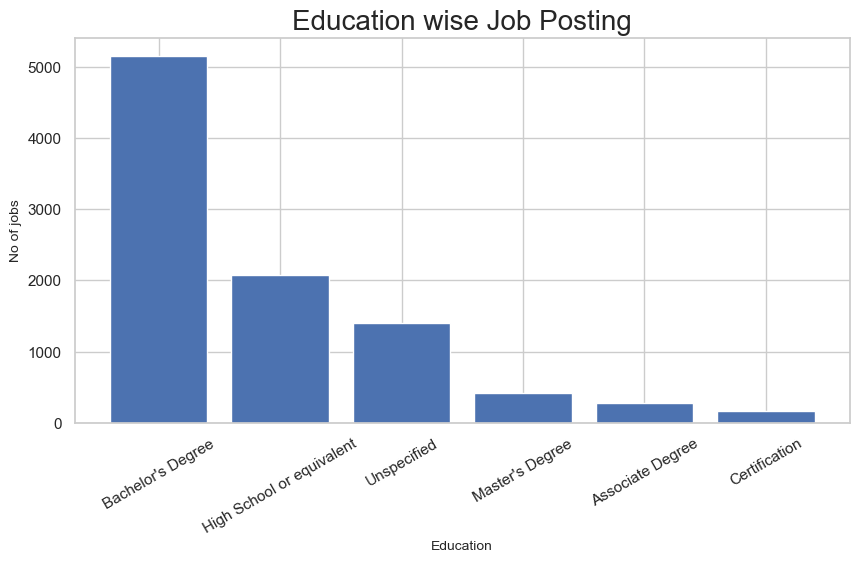

In [17]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(edu.keys(),edu.values())
plt.title('Education wise Job Posting',size=20)
plt.xlabel('Education',size=10)
plt.ylabel('No of jobs',size=10)
plt.xticks(rotation=30)
plt.show() 

## Data Pre-Processing

In [18]:
df['x']=df.title.apply(str)+" "+df.company_profile.apply(str)+" "+df.description.apply(str)+" "+df.requirements.apply(str)+" "+df.required_experience.apply(str)+" "+df.required_education.apply(str)+" "+df.benefits.apply(str)

In [19]:
df.head(2)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country,x
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US,"Marketing Intern We're Food52, and we've creat..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Customer Service - Cloud Video Production 90 S...


In [20]:
df=df.loc[:,['x','fraudulent']]

In [21]:
df

,x,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0
...,...,...
17875,Account Director - Distribution Vend is looki...,0
17876,Payroll Accountant WebLinc is the e-commerce p...,0
17877,Project Cost Control Staff Engineer - Cost Con...,0
17878,Graphic Designer Nemsia Studios is looking fo...,0


In [22]:
df.rename(columns={'fraudulent':'y'},inplace=True)
df

,x,y
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0
...,...,...
17875,Account Director - Distribution Vend is looki...,0
17876,Payroll Accountant WebLinc is the e-commerce p...,0
17877,Project Cost Control Staff Engineer - Cost Con...,0
17878,Graphic Designer Nemsia Studios is looking fo...,0


In [23]:
df.x.str.lower() 

0        marketing intern we're food52, and we've creat...
1        customer service - cloud video production 90 s...
2        commissioning machinery assistant (cma) valor ...
3        account executive - washington dc our passion ...
4        bill review manager spotsource solutions llc i...
                               ...                        
17875    account director - distribution  vend is looki...
17876    payroll accountant weblinc is the e-commerce p...
17877    project cost control staff engineer - cost con...
17878    graphic designer  nemsia studios is looking fo...
17879    web application developers vend is looking for...
Name: x, Length: 17880, dtype: object

In [24]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
l1=list(stopwords.words('english'))

In [27]:
def text_process(mess):
    """"
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split() if word not in l1]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(df['x'])

In [30]:
bow_transformer.vocabulary_

{'Marketing': 34896,
 'Intern': 29342,
 'Were': 61050,
 'Food52': 23409,
 'weve': 183534,
 'created': 85292,
 'groundbreaking': 108891,
 'awardwinning': 71082,
 'cooking': 84353,
 'site': 162656,
 'We': 60740,
 'support': 170028,
 'connect': 82982,
 'celebrate': 77192,
 'home': 111368,
 'cooks': 84357,
 'give': 107938,
 'everything': 100286,
 'need': 130612,
 'one': 133862,
 'placeWe': 140339,
 'top': 177261,
 'editorial': 94927,
 'business': 74934,
 'engineering': 96749,
 'team': 172113,
 'focused': 105025,
 'using': 180583,
 'technology': 173721,
 'find': 104273,
 'new': 131612,
 'better': 72898,
 'ways': 182553,
 'people': 138547,
 'around': 69071,
 'specific': 165828,
 'food': 105420,
 'interests': 116943,
 'offer': 132987,
 'superb': 169641,
 'highly': 110987,
 'curated': 86001,
 'information': 115127,
 'attract': 70418,
 'talented': 171486,
 'contributors': 84081,
 'country': 84916,
 'also': 65879,
 'publish': 149931,
 'wellknown': 183435,
 'professionals': 147562,
 'like': 12210

In [31]:
tdm=bow_transformer.transform(df['x'])

# WordCloud Visualization

In [41]:
tab_df=df[df.y==0]

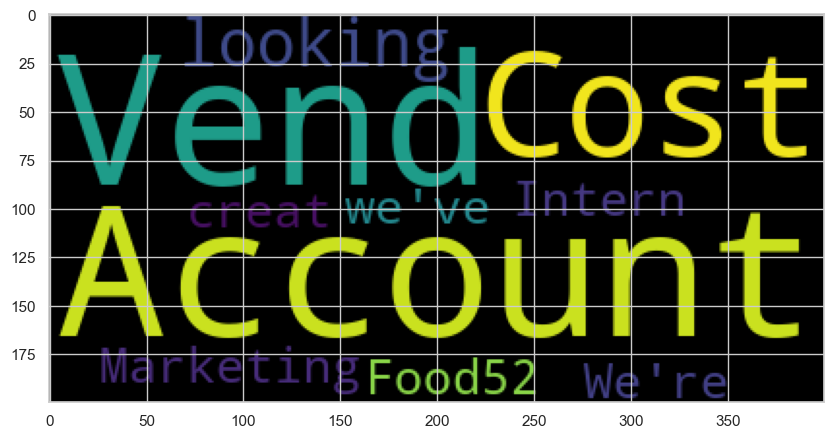

In [42]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=10).generate(str(tab_df['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [43]:
tab_df_y=df[df.y==1]

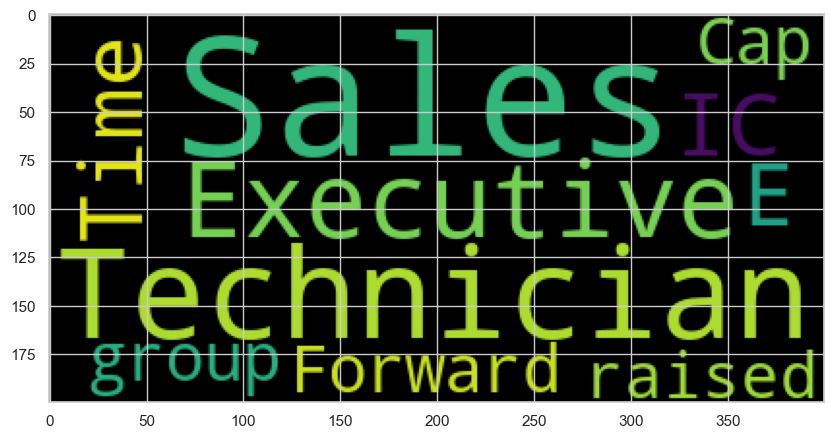

In [44]:
tab_df_y=df[df.y==1]
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=10).generate(str(tab_df_y['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## Split Data Into Train_Test

In [40]:
from sklearn.model_selection import train_test_split
tdm_train,tdm_test,y_train,y_test=train_test_split(tdm,df['y'],test_size=.2)

## Model Building Algorithms

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [46]:
logreg.fit(tdm_train,y_train)

LogisticRegression()

In [47]:
pred_logreg_test=logreg.predict(tdm_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

In [49]:
tab2=confusion_matrix(pred_logreg_test,y_test)
tab2

array([[3390,   47],
       [  13,  126]], dtype=int64)

In [50]:
tab3=pd.DataFrame(tab2)
tab3.index=['Non-Fraud','Fraud']
tab3.columns=['Non-Fraud','Fraud']
tab3

,Non-Fraud,Fraud
Non-Fraud,3390,47
Fraud,13,126


In [51]:
accuracy_score(pred_logreg_test,y_test)

0.9832214765100671

In [52]:
recall_score(pred_logreg_test,y_test)

0.9064748201438849

In [53]:
f1_score(pred_logreg_test,y_test)

0.8076923076923076

In [54]:
precision_score(pred_logreg_test,y_test)

0.7283236994219653

In [55]:
pred_prob_test=logreg.predict_proba(tdm_test)
pred_prob_test

array([[9.99918351e-01, 8.16494908e-05],
       [9.99987646e-01, 1.23542395e-05],
       [9.99782160e-01, 2.17839550e-04],
       ...,
       [9.99661687e-01, 3.38312806e-04],
       [9.99610804e-01, 3.89195997e-04],
       [9.99879663e-01, 1.20337064e-04]])

In [56]:
from sklearn.metrics import roc_auc_score , roc_curve

In [57]:
roc_auc_score(y_test,pred_prob_test[:,1])

0.9785992977974213

In [58]:
fpr,tpr,threshould= roc_curve(y_test,pred_prob_test[:,1])

In [59]:
import matplotlib.pyplot as plt


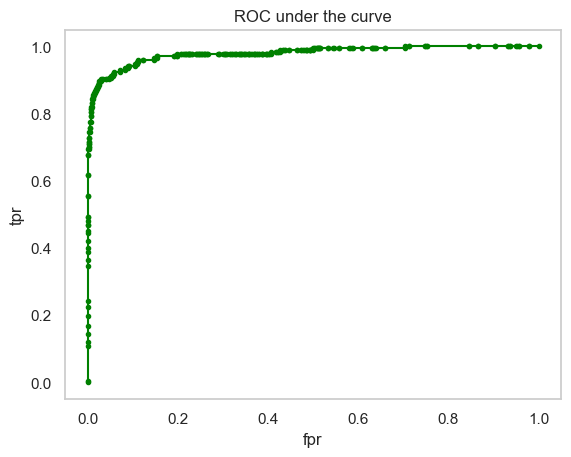

In [60]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('fpr')

plt.ylabel('tpr')
plt.title('ROC under the curve')
plt.grid()

## Decision-Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced')

In [62]:
dt.fit(tdm_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [63]:
pred_test_dt=dt.predict(tdm_test)

In [64]:
tab5=confusion_matrix(pred_test_dt,y_test)

In [65]:
tab6=pd.DataFrame(tab5)
tab6.index=['Non-Fraud','Fraud']
tab6.columns=['Non-Fraud','Fraud']
tab6

,Non-Fraud,Fraud
Non-Fraud,3266,55
Fraud,137,118


In [66]:
accuracy_score(pred_test_dt,y_test)

0.9463087248322147

In [67]:
recall_score(pred_test_dt,y_test)

0.4627450980392157

In [68]:
precision_score(pred_test_dt,y_test)

0.6820809248554913

In [69]:
f1_score(pred_test_dt,y_test)

0.5514018691588785

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [71]:
search_dict={'criterion':['gini','entropy'],
               'max_depth':range(4,9),
              'min_samples_split':[100,150,200]}

In [72]:
dt=DecisionTreeClassifier()
grid_dt=GridSearchCV(dt,param_grid=search_dict)

In [73]:
grid_dt.fit(tdm_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [100, 150, 200]})

In [74]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 100}

In [75]:
pred_grid_dt_test=grid_dt.predict(tdm_test)

In [76]:
tab=confusion_matrix(pred_grid_dt_test,y_test)

In [77]:
tab1=pd.DataFrame(tab)
tab1.columns=['Non-Fraud','Fraud']
tab1.index=['Non-Fraud','Fraud']

In [78]:
tab1

,Non-Fraud,Fraud
Non-Fraud,3398,107
Fraud,5,66


In [79]:
accuracy_score(pred_grid_dt_test,y_test)

0.9686800894854586

In [80]:
recall_score(pred_grid_dt_test,y_test)

0.9295774647887324

## Random-Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier( n_estimators=50)

In [82]:
rfc.fit(tdm_train,y_train)

RandomForestClassifier(n_estimators=50)

In [83]:
pred_test_rfc=rfc.predict(tdm_test)

In [84]:
confusion_matrix(pred_test_rfc,y_test)

array([[3402,   59],
       [   1,  114]], dtype=int64)

In [85]:
accuracy_score(pred_test_rfc,y_test)

0.9832214765100671

In [86]:
recall_score(pred_test_rfc,y_test)

0.991304347826087

In [87]:
f1_score(pred_test_rfc,y_test)

0.7916666666666666

In [88]:
precision_score(pred_test_rfc,y_test)

0.6589595375722543

## Support Vector Machine

In [89]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [90]:
svc.fit(tdm_train,y_train)

SVC(kernel='linear')

In [91]:
pred_svc_test=svc.predict(tdm_test)

In [92]:
tab9=confusion_matrix(pred_svc_test,y_test)

In [93]:
tab8=pd.DataFrame(tab9)
tab8.columns=['Non-Fraud','Fraud']
tab8.index=['Non-Fraud','Fraud']
tab8

,Non-Fraud,Fraud
Non-Fraud,3376,42
Fraud,27,131


In [94]:
accuracy_score(pred_svc_test,y_test)

0.9807046979865772

In [95]:
recall_score(pred_svc_test,y_test)

0.8291139240506329

In [96]:
precision_score(pred_svc_test,y_test)

0.7572254335260116

In [97]:
f1_score(pred_svc_test,y_test)

0.7915407854984894